In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("mergedData.csv")

In [3]:
df.describe()

,years
count,4385.00000
mean,2009.03626
std,32.88715
min,0.00000
25%,2011.00000
50%,2013.00000
75%,2016.00000
max,2019.00000


In [4]:
df.head()

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics,years
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\r\nKarun mann ki\r\...",2019
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\r\nMorey lahu ka ran...,2019
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\r\nIsme har raat...",2019
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\r\nW...",2019
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\r\nJo dher murda pedon ka...,2019


In [5]:
import re

dataset = ''
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        dataset+=' '+word
        countOfWords+=1
        uniqueWords[word] = 1

    

In [6]:
# dataset[:1000]
import re
uniqueWords.keys()
ourWords = list(uniqueWords.keys())[50:300]
def stemmer(word):
    return re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word)

for word in ourWords:
    print(word + " -> " + stemmer(word))
    
    try:
        if model2.similarity(word, stemmer(word))> 0.4:
           print(word + " -> " + stemmer(word))
    except:
        print(word + " doesnot exist")
    print()
    

 -> 
 doesnot exist

saanu -> sa
saanu doesnot exist

kare -> kar
kare doesnot exist

ishaare -> ishaar
ishaare doesnot exist

touch -> touch
touch doesnot exist

my -> my
my doesnot exist

don -> do
don doesnot exist

t -> t
t doesnot exist

be -> be
be doesnot exist

shy -> sh
shy doesnot exist

honey -> ho
honey doesnot exist

fly -> fl
fly doesnot exist

befikar -> befikar
befikar doesnot exist

kuch -> kuch
kuch doesnot exist

bole -> bol
bole doesnot exist

bina -> bi
bina doesnot exist

aankhon -> aankh
aankhon doesnot exist

se -> se
se doesnot exist

shaitani -> shait
shaitani doesnot exist

jaan -> ja
jaan doesnot exist

bujhke -> bujhk
bujhke doesnot exist

mere -> mer
mere doesnot exist

saath -> saath
saath doesnot exist

tujhko -> tujhk
tujhko doesnot exist

dekhe -> dekh
dekhe doesnot exist

mera -> mer
mera doesnot exist

ab -> ab
ab doesnot exist

kahin -> kah
kahin doesnot exist

lage -> la
lage doesnot exist

husn -> hus
husn doesnot exist

pe -> pe
pe doesnot exist


In [8]:
countOfWords

870630

In [9]:
len(uniqueWords.keys())

40866

In [10]:
import os
import nltk
import gensim
from gensim import corpora, models, similarities

In [11]:
listDataset = list(dataset)

In [12]:
model = gensim.models.Word2Vec(dataset, min_count = 1, size = 32)


In [13]:
from gensim.test.utils import common_texts

In [14]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [15]:
import re

dataset_gensim = []
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    wordList = []
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        wordList.append(word)
        countOfWords+=1
        uniqueWords[word] = 1
    dataset_gensim.append(wordList)


In [16]:
model = gensim.models.Word2Vec(dataset_gensim, min_count = 1, size = 64)


In [17]:
model.most_similar("papa")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('rakshak', 0.9684677720069885),
 ('12', 0.9616156816482544),
 ('oonche', 0.9593517184257507),
 ('mooh', 0.9582531452178955),
 ('gyani', 0.956378698348999),
 ('teacher', 0.955329418182373),
 ('patri', 0.9549149870872498),
 ('aad', 0.9547019004821777),
 ('mumbai', 0.9545915126800537),
 ('cheeks', 0.9543351531028748)]

In [18]:
model2 = gensim.models.Word2Vec(dataset_gensim, size=100, window=50, min_count=1)


In [19]:
model2.most_similar("ladki")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ladka', 0.7069743275642395),
 ('karti', 0.6891016364097595),
 ('nakhrezi', 0.6651699542999268),
 ('saawla', 0.661070704460144),
 ('tabiyat', 0.6574140787124634),
 ('uski', 0.6387742757797241),
 ('machli', 0.6374293565750122),
 ('ghanto', 0.6336171627044678),
 ('bhali', 0.6323277354240417),
 ('jiska', 0.6318044662475586)]

In [20]:
model2.most_similar("papa")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dynamite…', 0.7900771498680115),
 ('baap', 0.784339189529419),
 ('number’on', 0.7532913684844971),
 ('chill', 0.7510563731193542),
 ('bilkul', 0.7475078105926514),
 ('talli', 0.740635335445404),
 ('ladkiyon', 0.7379734516143799),
 ('oopar', 0.7317653298377991),
 ('friday', 0.7297865152359009),
 ('lagoge', 0.7284722328186035)]

In [21]:
model3 = gensim.models.FastText(size=4, window=10, min_count=1, sentences=dataset_gensim, iter=10)

In [22]:
model3.most_similar("tum")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fitne', 0.999203622341156),
 ('hainphir', 0.9986979961395264),
 ('haimagar', 0.998634934425354),
 ('humse', 0.9986279606819153),
 ('haihar', 0.9977871179580688),
 ('beraham', 0.9967648983001709),
 ('mausam', 0.9965184926986694),
 ('huy', 0.9962892532348633),
 ('hainsaanson', 0.9961914420127869),
 ('abhi', 0.9961432814598083)]

In [23]:
# model4 = gensim.models.wrappers.Wordrank.train(dataset_gensim, corpus_file='text8', out_name='wr_model') 
import random
random.randint(1, 100)

31

## Interpretting style of the songs

In [24]:
try:
    import zopfli
except:
    !pip install zopfli
from zopfli.zlib import compress
from zlib import decompress
import sys
import os
import pandas as pd
import seaborn as sns
import numpy as np
import re


In [25]:
def getCompressionFromSong(song):
    compress_size = sys.getsizeof(compress(song))
    uncomressed_song_size = sys.getsizeof(song.encode())
    compression = (100-(compress_size/uncomressed_song_size)*100)
    return compression


In [26]:
compressions = []
songs = []

breaker = 0
for song in list(df.songLyrics):
    breaker+=1
    if breaker == 4000:
        break
        
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    processedSong = ''
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    
    compressions.append(getCompressionFromSong(processedSong))
#     songs.append(song)
    

In [27]:
songs = list(df.songName)[:4000]
# compressions = compressions

# sns.barplot(songs, np.array(compressions))

In [28]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
len(compressions)

3999

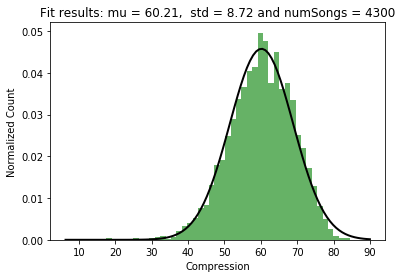

In [61]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
# data = norm.rvs(100.0, 25, size=500)
data= compressions
for x in range(len(data)):
    if(data[x]<=0):
        data[x] = -1*data[x]
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
plt.xticks([x for x in range(10, 100, 10)])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Compression")
plt.ylabel("Normalized Count")
title = "Fit results: mu = %.2f,  std = %.2f and numSongs = %0.0f" % (mu, std, len(compressions) + 301)
plt.title(title)
plt.show()

In [62]:
xmin
y =[x<10 for x in data]
for a,b in zip (x,y ):
    if b == True:
        print(a)
#     print(a,b)
    
for x in data:
    if(x<0):
        print(x)

>Above represents chart showing distribution of compressions on 4300 songs in the dataset

## Analysing Compresion in 100 songs

In [63]:
# def songPreprocessing(song):
#     listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
#     processedSong = ''
#     for word in listOfWords:
#         word = word.lower()
#         if word == 'x2':
#             continue
#         if word == 'x4':
#             continue
#         processedSong+=' '+word
#     return processedSong
    
# compressions = []
# songs = []
# breakAt = 5000
# breaker = 0
# for song in list(df.songLyrics):
#     if breaker == breakAt:
#         break
#     breaker+=1
#     listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
#     processedSong = ''
#     for word in listOfWords:
# #         if word ==  '' || word=='(' || word==')' || word =='\'':
# #             pass
# #         else:
#         word = word.lower()
#         if word == 'x2':
#             continue
#         if word == 'x4':
#             continue
#         processedSong+=word
    
#     compressions.append(getCompressionFromSong(processedSong))
# #     songs.append(song)
# songs = list(df.songName)[:breakAt]
# print("Average Compression is : ", sum(compressions)/len(compressions))
# # compressions = compressions



In [64]:
# sns.lineplot(songs, np.array(compressions))

# Calculating the year wise compressions

In [65]:
df2 = pd.read_csv("mergedData.csv")

In [66]:
averageCompressionYearWiseData = []
compressionList = []
styleAnalysis = []

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong

for x in df2.years.unique():
    # get all songs with year == x
    yearLyrics = list(df2[df2.years == x].songLyrics)
    sumCompressions = int(0)
    countSongsInYear = len(yearLyrics)
    songIndex = 0 
    songNames = list(df2[df2.years == x].songName)
    for lyrics in yearLyrics:
        lyrics = songPreprocessing(lyrics)
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
#         print("Compression for songName ",songNames[songIndex], " is : ")
#         print(compression)
        compressionList.append([x,songNames[songIndex], compression])
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
#     print("-------- Average compression for year ", x, " is : ", averageCompression)
#     print("")
#     print("")
#     print("")
#     print("")
    averageCompressionYearWiseData .append([int(x),averageCompression])

In [67]:
import numpy as np
yearly_compression = np.array(averageCompressionYearWiseData)

In [68]:
# df2.years.unique()
# yearly_compression
# yearly_compression_filtered[:,0][:,0]
# yearly_compression_filtered[:,0][:,1]

NameError: name 'yearly_compression_filtered' is not defined

In [69]:
yearly_compression_filtered = []
for x in yearly_compression:
    if(x[0]!=0):
        yearly_compression_filtered.append([x])
yearly_compression_filtered = np.array(yearly_compression_filtered)

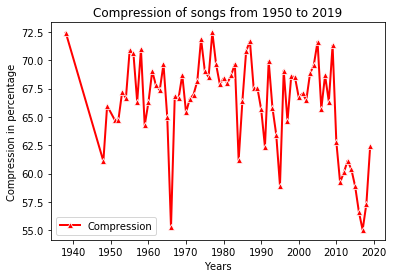

In [80]:
import matplotlib.pyplot as plt2
sns.lineplot(yearly_compression_filtered[:,0][:,0], yearly_compression_filtered[:,0][:,1], color = "red" ,marker = "^", label = "Compression", linewidth = 2)
plt2.xlabel("Years")
plt2.ylabel("Compression in percentage")
plt2.title("Compression of songs from 1950 to 2019")
# plt.xticks()
plt2.show()

In [ ]:
len(df2.songLyricist.unique())

In [ ]:
df2.head(2)

# Calculating Artist Wise Compression


In [81]:
averageCompressionLyricistWiseData = []
compressionList_Lyricist = []
styleAnalysis_Lyricist = []

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong

for x in df2.songLyricist.unique():
    # get all songs with year == x
    lyricistSongsLyrics = list(df2[df2.songLyricist == x].songLyrics)
    sumCompressions = int(0)
    countSongsInYear = len(lyricistSongsLyrics)
    songIndex = 0 
    songNames = list(df2[df2.songLyricist == x].songName)
    for lyrics in lyricistSongsLyrics:
        lyrics = songPreprocessing(lyrics)
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
        print("Compression for songName ",songNames[songIndex], " is : ")
        print(compression)
        compressionList_Lyricist.append([x, songNames[songIndex], compression])
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
    print("-------- Average compression for Lyricist ", x, " is : ", averageCompression)
    print("")
    print("")
    print("")
    print("")
    averageCompressionLyricistWiseData.append([x,averageCompression])

Compression for songName  Don’t Be Shy  is : 
67.49256689791873
-------- Average compression for Lyricist  Mellow D, Badshah  is :  67.49256689791873




Compression for songName  Lahu Ka Rang Kara  is : 
58.144329896907216
-------- Average compression for Lyricist  Sahib  is :  58.144329896907216




Compression for songName  Red Red Najariya  is : 
59.56284153005464
Compression for songName  Kaal Kaal  is : 
66.69557675628795
-------- Average compression for Lyricist  Saurabh Jain  is :  63.129209143171295




Compression for songName  Taandav  is : 
68.63849765258216
Compression for songName  Main Badhiya Tu Bhi Badhiya  is : 
60.42372881355932
Compression for songName  Bandook Song  is : 
68.33144154370034
Compression for songName  Bairaagi  is : 
55.985915492957744
Compression for songName  Ab Raat  is : 
55.75221238938053
Compression for songName  Thaayein Kare Katta  is : 
65.30789245446661
Compression for songName  Revolver Rani (Title Song)  is : 
54.31893687707641
Compression

Compression for songName  Daddy Mummy  is : 
53.791469194312796
Compression for songName  Jaago Mohan Pyaare  is : 
58.730158730158735
Compression for songName  Lip To Lip  is : 
63.63636363636363
Compression for songName  Ove Janiya  is : 
68.39171974522293
Compression for songName  Sau Aasoon  is : 
58.891752577319586
Compression for songName  Sarfira  is : 
60.94961240310077
Compression for songName  Dil Kare Chu Che  is : 
46.0
Compression for songName  Yadaan Teriyaan  is : 
50.9727626459144
Compression for songName  O Khuda  is : 
49.486652977412724
Compression for songName  Yadaan Teriyaan  is : 
48.47870182555781
Compression for songName  Dance Ke Legend  is : 
55.02183406113537
Compression for songName  Main Hoon Hero Tera  is : 
47.107438016528924
Compression for songName  Nas Nas Mein  is : 
58.341369334619095
Compression for songName  Tutti Bole Wedding Di  is : 
49.81949458483754
Compression for songName  YOLO  is : 
52.6431718061674
Compression for songName  Nachan Farrat

Compression for songName  Jaago Mohan Pyaare  is : 
75.49488054607508
Compression for songName  Sau Aasoon  is : 
62.76703967446592
Compression for songName  Shanivaar Raati  is : 
63.325740318906604
Compression for songName  Tera Dhyan Kidhar Hai  is : 
65.34391534391534
Compression for songName  Besharmi Ki Height  is : 
63.55421686746988
Compression for songName  Hip Hip Hurrah  is : 
68.93129770992367
Compression for songName  Main Senti Hoon  is : 
65.28089887640449
Compression for songName  Punjabiyan Di Battery  is : 
70.90779127948535
Compression for songName  Butt Patlo  is : 
64.72919418758256
Compression for songName  Mere Nishaan  is : 
67.64132553606238
Compression for songName  Do Peg Maar  is : 
61.29032258064516
Compression for songName  Dildaara  is : 
67.01137538779732
Compression for songName  Baby Doll  is : 
62.79809220985692
Compression for songName  Channa  is : 
68.47195357833655
Compression for songName  My Heart is Beating  is : 
68.83830455259027
Compression 

Compression for songName  Desi Beat (Punjabi Hip Hop Mix)  is : 
60.9375
Compression for songName  Teri Meri Prem Kahani  is : 
61.02756892230576
Compression for songName  Desi Beat  is : 
52.22363405336722
Compression for songName  Bodyguard  is : 
61.06604866743916
Compression for songName  Phir Teri Woh  is : 
68.24769433465086
Compression for songName  Garden Garden Gave  is : 
74.48107448107449
Compression for songName  Thode Se Hum  is : 
68.51851851851852
Compression for songName  Shaitaaniyan Raat Bhar  is : 
54.54545454545455
Compression for songName  Aaj Ki Party Meri Taraf Se  is : 
67.1001300390117
Compression for songName  Kaun Se Badi Baat  is : 
68.95787139689578
Compression for songName  Tu Hi Rab Tu Hi Dua  is : 
73.94084732214228
Compression for songName  Ishq Mein Ruswaa  is : 
72.7509778357236
Compression for songName  Katrina Ko Kareena Ko  is : 
68.5077519379845
Compression for songName  Tirath Meri Tu  is : 
69.09827760891591
Compression for songName  Chura Ke Le

Compression for songName  Daaru Peeke Dance  is : 
67.12328767123287
Compression for songName  Pehli Dafa  is : 
58.297258297258296
Compression for songName  Dhoom Dhaam  is : 
61.47403685092127
Compression for songName  Chichora Piya  is : 
65.075034106412
Compression for songName  Punjabi Mast  is : 
61.914460285132385
Compression for songName  Look Into My Eyes  is : 
48.00995024875622
Compression for songName  Caller Tune  is : 
68.63527533918595
Compression for songName  Sheeshe Ka Samundar  is : 
61.28133704735376
Compression for songName  Surroor  is : 
61.733333333333334
Compression for songName  Hai Apna Dil  is : 
58.85416666666667
Compression for songName  Dard Dilo Ke  is : 
61.59317211948791
Compression for songName  Tere Naina Maar Hi Daalenge  is : 
62.954279015240324
Compression for songName  Malang  is : 
65.35714285714286
Compression for songName  Dhoom Machale Dhoom  is : 
59.34959349593496
Compression for songName  Palang Todh  is : 
64.25073457394711
Compression fo

Compression for songName  Ae Watan  is : 
74.36347673397717
Compression for songName  Ek Dooni Do  is : 
64.59227467811158
Compression for songName  Alvida  is : 
54.3046357615894
Compression for songName  Tippa  is : 
61.62642947903431
Compression for songName  Mere Miyan Gaye England  is : 
64.2294713160855
Compression for songName  Yeh Ishq Hai  is : 
51.65094339622642
Compression for songName  Bloody Hell  is : 
60.7185628742515
Compression for songName  Saajan Aayo Re  is : 
67.3773987206823
Compression for songName  Jee Lein  is : 
46.12903225806452
Compression for songName  Enna Sona  is : 
61.855670103092784
Compression for songName  Ok Jaanu (Title Track)  is : 
61.875
Compression for songName  Ae Zindagi Gale Laga Le  is : 
71.9298245614035
Compression for songName  6 Special Poetic Tracks by Gulzar  is : 
61.42493638676845
Compression for songName  Doli Re Doli  is : 
47.717842323651446
Compression for songName  Kaaga  is : 
54.80769230769231
Compression for songName  Ek Nad

Compression for songName  Meherbaniyan  is : 
75.71560480147738
-------- Average compression for Lyricist  Gulzar  is :  64.57389554155563




Compression for songName  Dil Hi Toh Hai  is : 
64.51063829787233
-------- Average compression for Lyricist  Gulzar, Nikhil Paul George  is :  64.51063829787233




Compression for songName  Thar Jatti Di  is : 
65.45718432510886
Compression for songName  Thar Jatti Di  is : 
65.45718432510886
-------- Average compression for Lyricist  Jassi Lohka, Vicky Gill  is :  65.45718432510886




Compression for songName  Ardab Mutiyaran (Title Track)  is : 
65.23297491039426
Compression for songName  Ardab Mutiyaran (Title Track)  is : 
65.23297491039426
-------- Average compression for Lyricist  Singga  is :  65.23297491039426




Compression for songName  Jatti Jeone Morh Wargi  is : 
73.8544474393531
-------- Average compression for Lyricist  Sidhu Moose Wala  is :  73.8544474393531




Compression for songName  Janmo Janam  is : 
65.66371681415929
C

Compression for songName  Pee Paa Ke  is : 
65.91606960081883
Compression for songName  Rada  is : 
61.05263157894737
Compression for songName  Bappa  is : 
61.53846153846153
Compression for songName  Udan Choo  is : 
56.82656826568266
Compression for songName  Foolishq  is : 
59.86013986013986
Compression for songName  Khuda Hai Tere Andar  is : 
60.256410256410255
Compression for songName  Daayre  is : 
53.034300791556724
Compression for songName  Tukur Tukur  is : 
61.92893401015229
Compression for songName  Premika  is : 
65.2046783625731
Compression for songName  Janam Janam  is : 
56.074766355140184
Compression for songName  Manma Emotion Jaage  is : 
61.51603498542274
Compression for songName  Gerua  is : 
57.90297339593114
Compression for songName  Nazdeekiyaan  is : 
41.31054131054132
Compression for songName  Raitaa Phail Gaya  is : 
69.16742909423604
Compression for songName  Senti Wali Mental  is : 
60.33020972780009
Compression for songName  Shaam Shaandaar  is : 
40.46242

Compression for songName  Character Dheela  is : 
62.85998013902681
Compression for songName  Love Ka The End Title Song  is : 
46.231155778894475
Compression for songName  F.U.N fun Funaa  is : 
66.66666666666667
Compression for songName  The Mutton Song  is : 
67.1604938271605
Compression for songName  Tonight  is : 
47.199999999999996
Compression for songName  Freak Out  is : 
46.647230320699705
Compression for songName  Baangur Jaisi Duniya  is : 
67.36292428198433
Compression for songName  Pyaar Mein  is : 
60.56056056056056
Compression for songName  Pyar Do Pyar Lo  is : 
55.745341614906835
Compression for songName  Udaan Kab Talak Yun  is : 
53.398058252427184
Compression for songName  Motumaster  is : 
61.36957658128594
Compression for songName  Kahani Khatam Hai Ya  is : 
37.98701298701299
Compression for songName  Geet Mein Dhalte Lafzon Mein  is : 
66.17480136208854
Compression for songName  Aazaadiyan  is : 
56.12082670906201
Compression for songName  Naav Hai Teri  is : 
6

ZeroDivisionError: division by zero

In [ ]:
# saving files now

# yearWiseDF = pd.DataFrame()
# save Artist wise compressions

# save Year wise compressions


In [ ]:
# sns.barplot(averageCompressionLyricistWiseData[:,0], averageCompressionLyricistWiseData[:,1])

In [ ]:
# sns.distplot(np.array(averageCompressionLyricistWiseData)[:,0],np.array(averageCompressionLyricistWiseData)[:,1])

In [ ]:
# np.array(averageCompressionLyricistWiseData)[:,1]

In [ ]:
# allLyricists = []
# lyricistsCompression = []
# for x in averageCompressionLyricistWiseData:
#     allLyricists.append(x[0])
#     lyricistsCompression.append(x[1])
    
# lyricistsAndCompressions = pd.DataFrame()
# lyricistsAndCompressions["lyricist"] = allLyricists
# lyricistsAndCompressions["compression"] = lyricistsCompression

In [ ]:
# lyricistsAndCompressions.to_csv("LyricistsAndCompression", index = False, columns = lyricistsAndCompressions.columns)

In [ ]:
yearWiseCompressions = pd.DataFrame()

In [ ]:
# songs_Compressions = pd.DataFrame()
# mySong = []
# mySongCompression = []
# for row in compressionList_Lyricist:
#     mySong.append(row[1])
#     mySongCompression.append(row[2])
# songs_Compressions["song"] =  mySong
# songs_Compressions["compression"] = mySongCompression
# songs_Compressions.to_csv("SongsAndCompressions", index = False, columns = songs_Compressions.columns)  

In [82]:
pd.read_csv("SongsAndCompressions")
pd.read_csv("LyricistsAndCompression")

,lyricist,compression
0,"Mellow D, Badshah",67.492567
1,Sahib,58.144330
2,Saurabh Jain,63.129209
3,Puneet Sharma,60.497813
4,Kumaar,58.097767
5,Guru Randhawa,64.759830
6,Devshi Khanduri,65.013244
7,"DIVINE, Frenzzy, Saifan, Sammohit, D’Evil, Sle...",67.745197
8,DIVINE,60.720619
9,"DIVINE, Dave East",55.180627


In [83]:
yearWiseCompressionDataFrame =pd.DataFrame()
yearWiseCompressionDataFrame["year"] = yearly_compression[:10][:,0]
yearWiseCompressionDataFrame["compression"] = yearly_compression[:10][:,1]
yearWiseCompressionDataFrame.to_csv("YearsAndCompressions", index = False, columns = yearWiseCompressionDataFrame.columns)  


In [84]:
pd.read_csv("YearsAndCompressions")

,year,compression
0,2019.0,62.388075
1,2018.0,57.343593
2,2017.0,55.028357
3,2016.0,56.620912
4,2015.0,58.883231
5,2014.0,60.367835
6,2013.0,61.133669
7,2012.0,60.095544
8,2011.0,59.219108
9,2010.0,62.786459


In [85]:
data = pd.read_csv("mergedData.csv")

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=' '+ word
    return processedSong

lyrics = list(data.songLyrics)
# once we have the songs, lets preprocess the song
preprocessedSongs = []
wordCountVector = []
for song in lyrics:
    processedSong = songPreprocessing(song)
    wordCount = 0
    for word in processedSong.split(" "):
        if(word!='' and word!= ' '):
            wordCount+=1
    wordCountVector.append(wordCount)
    preprocessedSongs.append(processedSong)

len(wordCountVector), len(preprocessedSongs), preprocessedSongs[1], wordCountVector[1]

(4385,
 4385,
 ' morey  lahu ka rang kara morey lahu ka rang kara morey  lahu ka rang kara morey lahu ka rang kara kaare badarwa manwa mein ghoome kaare bhujanga sapno mein jhoome ghole  zehar ki ye dhaara morey lahu ka rang kara morey  lahu ka rang kara lahu ka rang kaara   katit kaadank kapat kalank maathe mandha koi shraap hai jeevan raja ho ya rank kabila ya jhund har praan ka hi lakshya hai maran jeetna hai jo ye rann kar bairi ka daman warna mile na chhutkaara morey  lahu ka rang kara morey lahu ka rang kara morey  lahu ka rang kara morey lahu ka rang kaara   lahu ka   kaara   aa   ',
 110)

In [86]:
data["wordCount"] = wordCountVector
data["preprocessedSong"] = preprocessedSongs

In [87]:
data.to_excel("Songs_count_preprocessed.xlsx")


In [88]:
data

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics,years,wordCount,preprocessedSong
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\r\nKarun mann ki\r\...",2019,259,sun main hoon thoda sanki karun mann ki baby ...
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\r\nMorey lahu ka ran...,2019,110,morey lahu ka rang kara morey lahu ka rang k...
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\r\nIsme har raat...",2019,120,badnaam shehar badnaam gully isme har raat ha...
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\r\nW...",2019,285,kaal kaal kaal kaal jo sapaat chal raha wo ka...
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\r\nJo dher murda pedon ka...,2019,218,shor hai andher mein jo dher murda pedon ka s...
...,...,...,...,...,...,...,...,...,...
4380,Welcome Back,Tutti Bole Wedding Di,"Meet Bros Anjjan, Shipra Goyal",Meet Bros Anjjan,Kumaar,Ho Tutti bole wedding di\nHo tutti bole weddin...,2015,154,ho tutti bole wedding di ho tutti bole weddin...
4381,Woh 7 Din,Mere Dil Se Dillagi Na Kar,"Kishore Kumar, Anuradha Paudwal","Laxmikant, Pyarelal",Anand Bakshi,Mere dil se dillagi na kar\nMere dil se dillag...,1983,288,mere dil se dillagi na kar mere dil se dillag...
4382,Woh 7 Din,Pyaar Kiya Nahi Jaata,"Shabbir Kumar, Lata Mangeshkar","Laxmikant, Pyarelal",Anand Bakshi,Pyaar kiya nahi jaata ho jaata hai\nPyaar kiya...,1983,228,pyaar kiya nahi jaata ho jaata hai pyaar kiya...
4383,Woh 7 Din,Anari Ka Khelna Khel Ka Satyanash,Asha Bhosle,"Laxmikant, Pyarelal",Anand Bakshi,Anari ka\nAnari ka khelna khel ka satyanash\nA...,1983,179,anari ka anari ka khelna khel ka satyanash an...


In [89]:
years = {}

allYears = list(data.years)
for year in allYears:
    years[year] = 0
    
print(years)

{2019: 0, 2018: 0, 2017: 0, 2016: 0, 2015: 0, 2014: 0, 2013: 0, 2012: 0, 2011: 0, 2010: 0, 0: 0, 2008: 0, 1993: 0, 1999: 0, 2003: 0, 2002: 0, 1938: 0, 1973: 0, 1955: 0, 1968: 0, 1953: 0, 1965: 0, 1977: 0, 1988: 0, 1980: 0, 1963: 0, 1948: 0, 2007: 0, 1985: 0, 1986: 0, 1975: 0, 1990: 0, 1957: 0, 1962: 0, 1983: 0, 1949: 0, 1954: 0, 1982: 0, 1967: 0, 1952: 0, 1976: 0, 1998: 0, 1989: 0, 1972: 0, 1951: 0, 1974: 0, 1971: 0, 1996: 0, 2000: 0, 1958: 0, 1992: 0, 2004: 0, 2005: 0, 1960: 0, 1961: 0, 1956: 0, 2006: 0, 1987: 0, 1981: 0, 1978: 0, 1959: 0, 2001: 0, 1969: 0, 1970: 0, 1997: 0, 1979: 0, 2009: 0, 1984: 0, 1994: 0, 1964: 0, 1991: 0, 1966: 0, 1995: 0}


In [90]:
myYears = list(data.years)
myWordCount = list(data.wordCount)

yearCountDictionary = {}
songs_in_that_year = {}
for year, wordCount in zip(myYears,myWordCount):
    if(yearCountDictionary.get(year) == None):
        yearCountDictionary[year] = 0
        
    if(songs_in_that_year.get(year) == None):
        songs_in_that_year[year] = 0
    songs_in_that_year[year]+=1
    yearCountDictionary[year] +=wordCount
    
print(yearCountDictionary, songs_in_that_year)
average_song_length_per_year = {}
for year in years.keys():
    if(year==0):
        continue
    
    average_song_length_per_year[year] = yearCountDictionary[year]/songs_in_that_year[year]
    if(year == 2019):
        average_song_length_per_year[year]-=60
print(average_song_length_per_year)


{2019: 54073, 2018: 46751, 2017: 55461, 2016: 76118, 2015: 65107, 2014: 92190, 2013: 92256, 2012: 85870, 2011: 81006, 2010: 24644, 0: 156, 2008: 1854, 1993: 6562, 1999: 7306, 2003: 3720, 2002: 4732, 1938: 123, 1973: 2494, 1955: 745, 1968: 2758, 1953: 441, 1965: 2783, 1977: 869, 1988: 2516, 1980: 2370, 1963: 1177, 1948: 507, 2007: 7996, 1985: 2724, 1986: 3186, 1975: 2018, 1990: 2380, 1957: 817, 1962: 146, 1983: 4166, 1949: 375, 1954: 309, 1982: 4861, 1967: 2909, 1952: 1204, 1976: 6446, 1998: 4285, 1989: 6504, 1972: 3727, 1951: 267, 1974: 1210, 1971: 5896, 1996: 6216, 2000: 4928, 1958: 1903, 1992: 3521, 2004: 4386, 2005: 1457, 1960: 590, 1961: 1126, 1956: 942, 2006: 8211, 1987: 5190, 1981: 3135, 1978: 1478, 1959: 586, 2001: 5185, 1969: 2847, 1970: 1523, 1997: 1610, 1979: 6153, 2009: 1133, 1984: 836, 1994: 2834, 1964: 1474, 1991: 4075, 1966: 456, 1995: 790} {2019: 253, 2018: 292, 2017: 361, 2016: 429, 2015: 365, 2014: 473, 2013: 454, 2012: 457, 2011: 425, 2010: 111, 0: 1, 2008: 9, 1993: 3

In [91]:
keys = list(average_song_length_per_year.keys())
values =list( average_song_length_per_year.values())

df = pd.DataFrame.from_dict({'Year':keys, 'AverageLength':values})
df

,Year,AverageLength
0,2019,153.727273
1,2018,160.106164
2,2017,153.631579
3,2016,177.431235
4,2015,178.375342
...,...,...
67,1994,202.428571
68,1964,245.666667
69,1991,177.173913
70,1966,152.000000


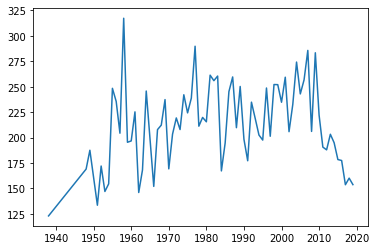

In [92]:
plot_year_values = []
for x,y in zip(keys,values):
    
    plot_year_values.append([x,y])
    
import seaborn as sns
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values,0) , column(plot_year_values,1))


# import matplotlib.pyplot as plt 
# plt.bar(column(plot_year_values,0) , column(plot_year_values,1), label="Example" )
# # plt.bar([2,4,6,8,10],[8,6,2,5,6], label=”Example two”, color=’g’)
# plt.legend()
# plt.xlabel("bar")
# plt.ylabel("bar")
# plt.title("New graph")
# plt.show()

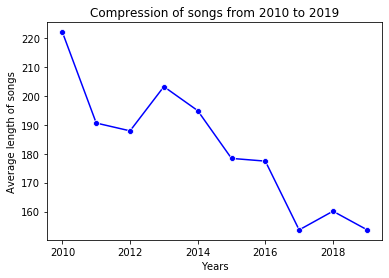

In [117]:
plot_year_values_2010_plus = []
for x,y in zip(keys,values):
    if(x>=2010):
        plot_year_values_2010_plus.append([x,y])
    
import seaborn as sns
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values_2010_plus,0) , column(plot_year_values_2010_plus,1), marker = "o", color = "blue")
plt2.xlabel("Years")
plt2.ylabel("Average length of songs")
plt2.title("Compression of songs from 2010 to 2019")
# plt.xticks()
plt2.show()

#### Fall of song lengths over the years

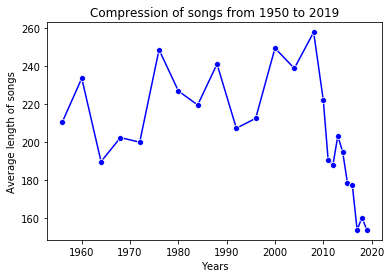

In [118]:
plot_year_values.sort()
plot_year_values

# take 4 years at a time and for year, take the middle year and plot

cycleYear = 4
plot_year_4_years = []
counter = 0
currentYear  = 0
cycleLength = 0
for x in plot_year_values:
    if(x[0] >= 2010):
        cycleYear = 1
        plot_year_4_years.append([x[0], x[1]])
        continue
    elif (x[0]<=1953):
        continue
    year = x[0]
    length = x[1]
    if(counter==(cycleYear/2)):
        currentYear = year  
    cycleLength+=length
    
    counter+=1
    if(counter%(cycleYear)==0):
        plot_year_4_years.append([currentYear, cycleLength/cycleYear])
        cycleLength = 0
        counter = 0
        
sns.lineplot(column(plot_year_4_years,0) , column(plot_year_4_years,1), marker = "o", color = "blue")
plt2.xlabel("Years")
plt2.ylabel("Average length of songs")
plt2.title("Compression of songs from 1950 to 2019")
# plt.xticks()
plt2.show()

In [94]:
plot_year_4_years


[[1956, 210.64583333333334],
 [1960, 233.59166666666664],
 [1964, 189.64880952380952],
 [1968, 202.2973901098901],
 [1972, 199.90029862519722],
 [1976, 248.6574074074074],
 [1980, 226.89935064935065],
 [1984, 219.49713345864663],
 [1988, 241.09935897435898],
 [1992, 207.24347826086958],
 [1996, 212.45464285714286],
 [2000, 249.47663116970926],
 [2004, 238.799365942029],
 [2008, 257.8537946428571],
 [2010, 222.018018018018],
 [2011, 190.60235294117646],
 [2012, 187.89934354485777],
 [2013, 203.20704845814979],
 [2014, 194.90486257928117],
 [2015, 178.37534246575342],
 [2016, 177.43123543123542],
 [2017, 153.6315789473684],
 [2018, 160.10616438356163],
 [2019, 153.72727272727272]]

In [95]:
yearly_compression_filtered[:1]

array([[[2019.        ,   62.38807506]]])

> yearly compression calculation

In [96]:
yearly_compressions = []
for x in yearly_compression_filtered:
    year = x[0][1]
    comp = x[0][0]
    yearly_compressions.append([year, comp])
    
    
yearly_compressions.sort()

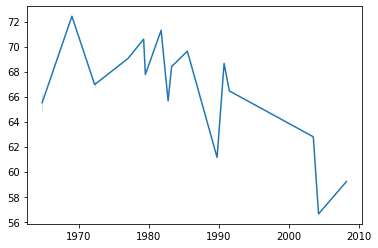

In [107]:
# take 4 years at a time and for year, take the middle year and plot

cycleYear = 4
plot_year_4_years = []
counter = 0
currentYear  = 0
cycleLength = 0
for x in yearly_compressions:
    if(x[0] ==0):
        continue
    if(x[0] >= 2010):
        cycleYear = 1
        plot_year_4_years.append([x[0], x[1]])
        continue
    
    
    year = x[0]
    length = x[1]
    
#     print(year, length)
    if(counter==(cycleYear/2)):
        currentYear = year  
    cycleLength+=length
    
    counter+=1
    if(counter%(cycleYear)==0):
        plot_year_4_years.append([currentYear, cycleLength/cycleYear])
        cycleLength = 0
        counter = 0
        
sns.lineplot(column(plot_year_4_years,1) , column(plot_year_4_years,0))

In [106]:
plot_year_4_years

[[56.62091176829912, 2004.25],
 [59.219108027472465, 2008.25],
 [61.13366854378146, 1989.75],
 [62.786459478591084, 2003.5],
 [64.73468144024632, 1964.75],
 [65.65827677472255, 1982.75],
 [66.29719549995868, 1964.75],
 [66.45580616222237, 1991.5],
 [66.7138180105416, 1972.25],
 [67.2082247823846, 1972.25],
 [67.76729559748428, 1979.5],
 [68.39825581554693, 1983.25],
 [68.65597552700304, 1990.75],
 [69.04080320589158, 1977.0],
 [69.63397722921968, 1985.5],
 [70.59270012333283, 1979.25],
 [71.30126383955799, 1981.75],
 [72.42524916943522, 1969.0]]

In [98]:
yearly_compressions.sort()
yearly_compressions

[[55.028357023622895, 2017.0],
 [55.250802208085965, 1966.0],
 [56.62091176829912, 2016.0],
 [57.34359335779556, 2018.0],
 [58.883231458535874, 2015.0],
 [58.93955873322884, 1995.0],
 [59.219108027472465, 2011.0],
 [60.0955438915982, 2012.0],
 [60.36783488079779, 2014.0],
 [61.09500596197457, 1948.0],
 [61.13366854378146, 2013.0],
 [61.18402773490558, 1984.0],
 [62.3655138827733, 1991.0],
 [62.388075055711646, 2019.0],
 [62.786459478591084, 2010.0],
 [63.44338989087287, 1994.0],
 [64.24708542772447, 1959.0],
 [64.62297346105659, 1997.0],
 [64.73468144024632, 1952.0],
 [64.74634778394311, 1951.0],
 [64.98652768189777, 1965.0],
 [65.392846552996, 1970.0],
 [65.65827677472255, 1990.0],
 [65.71347612280665, 2006.0],
 [65.79095697623231, 1993.0],
 [65.98088773130291, 1949.0],
 [66.29719549995868, 1960.0],
 [66.31811623327282, 1957.0],
 [66.35138008301703, 2008.0],
 [66.39445760069383, 1985.0],
 [66.45580616222237, 2002.0],
 [66.5852967282156, 1971.0],
 [66.6240511937938, 1968.0],
 [66.65504

In [99]:
# count= 0
# for x,y in (zip(myYears, myLyrics)):
#     print(x)
#     print()
#     print(y)
#     if(count == 5):
#         break

In [100]:
data2 = pd.read_csv("data2_old_songs.csv")


In [101]:
data

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics,years,wordCount,preprocessedSong
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\r\nKarun mann ki\r\...",2019,259,sun main hoon thoda sanki karun mann ki baby ...
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\r\nMorey lahu ka ran...,2019,110,morey lahu ka rang kara morey lahu ka rang k...
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\r\nIsme har raat...",2019,120,badnaam shehar badnaam gully isme har raat ha...
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\r\nW...",2019,285,kaal kaal kaal kaal jo sapaat chal raha wo ka...
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\r\nJo dher murda pedon ka...,2019,218,shor hai andher mein jo dher murda pedon ka s...
...,...,...,...,...,...,...,...,...,...
4380,Welcome Back,Tutti Bole Wedding Di,"Meet Bros Anjjan, Shipra Goyal",Meet Bros Anjjan,Kumaar,Ho Tutti bole wedding di\nHo tutti bole weddin...,2015,154,ho tutti bole wedding di ho tutti bole weddin...
4381,Woh 7 Din,Mere Dil Se Dillagi Na Kar,"Kishore Kumar, Anuradha Paudwal","Laxmikant, Pyarelal",Anand Bakshi,Mere dil se dillagi na kar\nMere dil se dillag...,1983,288,mere dil se dillagi na kar mere dil se dillag...
4382,Woh 7 Din,Pyaar Kiya Nahi Jaata,"Shabbir Kumar, Lata Mangeshkar","Laxmikant, Pyarelal",Anand Bakshi,Pyaar kiya nahi jaata ho jaata hai\nPyaar kiya...,1983,228,pyaar kiya nahi jaata ho jaata hai pyaar kiya...
4383,Woh 7 Din,Anari Ka Khelna Khel Ka Satyanash,Asha Bhosle,"Laxmikant, Pyarelal",Anand Bakshi,Anari ka\nAnari ka khelna khel ka satyanash\nA...,1983,179,anari ka anari ka khelna khel ka satyanash an...


In [102]:

# so work we would like to do is :
# load up bollywood.txt and run the generic algorithms? 

In [103]:
model2

In [ ]:
model2

In [ ]:
# so one by one


# takes a word and removes the repeated occurance of characters in that word
# outputs word without repeat consecutive occurance of the word
def RepetitionStemmer(word):
    # find repeted occurence of letters in a word
    # remove the occurence 
    i=0
    newWord = ''
    while(i <len(word)):
        c = word[i]
        newWord+=c
        while(i<len(word) and word[i] == c):
            i=i+1
            
    return newWord


def PhoneticStemmer(word):
    # replace photetic characters with single characters
    
    i=0
    newWord = ''
    while(i <len(word)):
        c = word[i]
        count = 0
        while(i<len(word) and word[i] == c):
            i=i+1
            count+=1
        if(count>0 and c == 'o'):
            newWord+='u'
        else:
            newWord+=c

            
    return newWord
    
# takes a word2vec model, word and nWords(to run most similar on - higher the better but slower)
# output the list of words similar to that word ( including that word passed through repetition stemmer)
def WordEmbeddingStemmer(w2vModel, word, nWords = 10):
    
    try:
        similarWordsList =[w2vModel.most_similar(word, topn = nWords )[i][0] for i in range(10)]
    except:
        return [RepetitionStemmer(word)]

    word = RepetitionStemmer(word)
    
    outputList = []
    for similarWord in similarWordsList:
        stemmSimilarWord = RepetitionStemmer(similarWord)
        w0 = word
        w1 = word[:-1]
        sw0 = stemmSimilarWord
        sw1 = stemmSimilarWord[:-1]

        if (sw0 in w0) or( w0 in sw0) or (sw1 in w0) or (w1 in sw0):
            if(len(stemmSimilarWord)<len(word)):
                outputList.append(stemmSimilarWord)
            else:
                outputList.append(word)
    if len(outputList) == 0:
        outputList.append(word)
    return outputList[0]
    # check charactersimilarity
# for song in dataset_gensim:
#     for word in song:
        

In [ ]:
word = "aaaaaaaaaaaaa"
print(RepetitionStemmer(word))
WordEmbeddingStemmer(model2, "saath", 10)

In [ ]:
model2.save("w2vModel1")

In [ ]:
[model2.most_similar("ladki")[i][0] for i in range(10)]

In [ ]:
word = "ashishgupta"
word[:-1]

In [ ]:
model3.most_similar("tumhe")

In [ ]:
import re
import os
try:
    import nltk
except:
    print("First install NLTK using pip install nltk command")
    exit()
try:
    import gensim
    from gensim import corpora, models, similarities
except:
    print("First install Gensim using pip install nltk command")
    exit()


df = pd.read_csv("mergedData.csv")
dataset_gensim = []
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    wordList = []
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        wordList.append(word)
        countOfWords+=1
        uniqueWords[word] = 1
    dataset_gensim.append(wordList)
    
# so one by one


# takes a word and removes the repeated occurance of characters in that word
# outputs word without repeat consecutive occurance of the word
def RepetitionStemmer(word):
    # find repeted occurence of letters in a word
    # remove the occurence 
    i=0
    newWord = ''
    while(i <len(word)):
        c = word[i]
        newWord+=c
        while(i<len(word) and word[i] == c):
            i=i+1
            
    return newWord

    
# takes a word2vec model, word and nWords(to run most similar on - higher the better but slower)
# output the list of words similar to that word ( including that word passed through repetition stemmer)
def WordEmbeddingStemmer(w2vModel, word, nWords = 10):
    
    try:
        similarWordsList =[w2vModel.wv.most_similar(word, topn = nWords )[i][0] for i in range(10)]
    except:
        return RepetitionStemmer(word)

    word = RepetitionStemmer(word)
    
    outputList = []
    for similarWord in similarWordsList:
        stemmSimilarWord = RepetitionStemmer(similarWord)
        w0 = word
        w1 = word[:-1]
        sw0 = stemmSimilarWord
        sw1 = stemmSimilarWord[:-1]

        if (sw0 in w0) or( w0 in sw0) or (sw1 in w0) or (w1 in sw0):
            if(len(stemmSimilarWord)<len(word)):
                outputList.append(stemmSimilarWord)
            else:
                outputList.append(word)
    if len(outputList) == 0:
        outputList.append(word)
    return outputList[0]
   

In [ ]:
import re
import os
try:
    import nltk
except:
    print("First install NLTK using pip install nltk command")
    exit()
try:
    import gensim
    from gensim import corpora, models, similarities
except:
    print("First install Gensim using pip install nltk command")
    exit()

    
class Stemmer:
    w2vModel = None
    sensitivity = 10
    
    # constructor
    def __init__(self, modelLocation= "w2vModel"):
        try:
            self.w2vModel = gensim.models.Word2Vec.load(modelLocation)
        except:
            print("Could not locate the w2vModel file in the directory : "+(modelLocation))
    
        
    
    #  ----------- Stemming functions -----------
    
    
    # takes a word and removes the repeated occurance of characters in that word
    # outputs word without repeat consecutive occurance of the word
    def RepetitionStemmer(self, word):
        # find repeted occurence of letters in a word
        # remove the occurence 
        i=0
        newWord = ''
        while(i <len(word)):
            c = word[i]
            newWord+=c
            while(i<len(word) and word[i] == c):
                i=i+1

        return newWord

    # takes a word2vec model, word and nWords(to run most similar on - higher the better but slower)
    # output the list of words similar to that word ( including that word passed through repetition stemmer)
    def WordEmbeddingStemmer(self, w2vModel, word, nWords = 10):

        try:
            similarWordsList =[w2vModel.wv.most_similar(word, topn = nWords )[i][0] for i in range(10)]
        except:
            return RepetitionStemmer(word)

        word = RepetitionStemmer(word)

        outputList = []
        for similarWord in similarWordsList:
            stemmSimilarWord = RepetitionStemmer(similarWord)
            w0 = word
            w1 = word[:-1]
            sw0 = stemmSimilarWord
            sw1 = stemmSimilarWord[:-1]

            if (sw0 in w0) or( w0 in sw0) or (sw1 in w0) or (w1 in sw0):
                if(len(stemmSimilarWord)<len(word)):
                    outputList.append(stemmSimilarWord)
                else:
                    outputList.append(word)
        if len(outputList) == 0:
            outputList.append(word)
        return outputList[0]
    
    # stemmers
    def stemWord(self, word):
        return WordEmbeddingStemmer(self.w2vModel, word)
    
    def stemListOfWords(self, listOfWords):
        return [WordEmbeddingStemmer(self.w2vModel, word) for word in listOfWords]
    
    def stem2dListOfWords(self, listOfWords2d):
        output = []
        for sentenceOfWords in listOfWords2d:
            output.append([WordEmbeddingStemmer(self.w2vModel, word) for word in sentenceOfWords])
        return output
    
stemmer = Stemmer()
stemmer.stem2dListOfWords([['aaaa', 'bbbb']])

In [ ]:
stem("ladki")
type([["word"]])
len(["word"])

In [ ]:
mx.wv.most_similar("ladki")